In [117]:
%matplotlib inline

## Loading the Data

Let's start by loading a subset of the data that is of particular interest. There's a lot of verbosely coded one-hot columns so we'll do some cleanup of column names and encoding as part of this.

In [118]:
import math
import pandas as pd


def to_onehot(x):
    return 1 if x != 'NA' else 0


def is_work(x):
    return x != 'NA' and x != 'hobby'


def is_yes(x):
    return x == 'Yes'


converters = {
    'Bash / Shell:What other language(s) do you use?': to_onehot,
    'C/C++:What other language(s) do you use?': to_onehot,
    'C#:What other language(s) do you use?': to_onehot,
    'Go:What other language(s) do you use?': to_onehot,
    'HTML/CSS:What other language(s) do you use?': to_onehot,
    'Java:What other language(s) do you use?': to_onehot,
    'JavaScript:What other language(s) do you use?': to_onehot,
    'PHP:What other language(s) do you use?': to_onehot,
    'R:What other language(s) do you use?': to_onehot,
    'SQL:What other language(s) do you use?': to_onehot,
    'TypeScript:What other language(s) do you use?': to_onehot,
    
    'Computer graphics: What do you use Python for?': to_onehot,
    'Data analysis: What do you use Python for?': to_onehot,
    'Desktop development: What do you use Python for?': to_onehot,
    'DevOps / System administration / Writing automation scripts: What do you use Python for?': to_onehot,
    'Educational purposes: What do you use Python for?': to_onehot,
    'Embedded development: What do you use Python for?': to_onehot,
    'Game development: What do you use Python for?': to_onehot,
    'Machine learning: What do you use Python for?': to_onehot,
    'Mobile development: What do you use Python for?': to_onehot,
    'Multimedia applications development: What do you use Python for?': to_onehot,
    'Network programming: What do you use Python for?': to_onehot,
    'Programming of web parsers / scrapers / crawlers: What do you use Python for?': to_onehot,
    'Software prototyping: What do you use Python for?': to_onehot,
    'Software testing / Writing automated tests: What do you use Python for?': to_onehot,
    'Web development: What do you use Python for?': to_onehot,
    
    'Computer graphics:To what extent are you involved in the following activities?': is_work,
    'Data analysis:To what extent are you involved in the following activities?': is_work,
    'Desktop development:To what extent are you involved in the following activities?': is_work,
    'DevOps / System administration / Writing automation scripts:To what extent are you involved in the following activities?': is_work,
    'Educational purposes:To what extent are you involved in the following activities?': is_work,
    'Embedded development:To what extent are you involved in the following activities?': is_work,
    'Game development:To what extent are you involved in the following activities?': is_work,
    'Machine learning:To what extent are you involved in the following activities?': is_work,
    'Mobile development:To what extent are you involved in the following activities?': is_work,
    'Multimedia applications development:To what extent are you involved in the following activities?': is_work,
    'Network programming:To what extent are you involved in the following activities?': is_work,
    'Programming of web parsers / scrapers / crawlers:To what extent are you involved in the following activities?': is_work,
    'Software prototyping:To what extent are you involved in the following activities?': is_work,
    'Software testing / Writing automated tests:To what extent are you involved in the following activities?': is_work,
    'Web development:To what extent are you involved in the following activities?': is_work,
    
    'Do you consider yourself as a Data-Scientist?': is_yes,
    
    'aiohttp:Which of the following frameworks / libraries do you use in addition to Python?': to_onehot,
    'Asyncio:Which of the following frameworks / libraries do you use in addition to Python?': to_onehot,
    'Kivy:Which of the following frameworks / libraries do you use in addition to Python?': to_onehot,
    'Pillow:Which of the following frameworks / libraries do you use in addition to Python?': to_onehot,
    'Pygame:Which of the following frameworks / libraries do you use in addition to Python?': to_onehot,
    'PyGTK:Which of the following frameworks / libraries do you use in addition to Python?': to_onehot,
    'PyQT:Which of the following frameworks / libraries do you use in addition to Python?': to_onehot,
    'Requests:Which of the following frameworks / libraries do you use in addition to Python?': to_onehot,
    'Scrapy:Which of the following frameworks / libraries do you use in addition to Python?': to_onehot,
    'Six:Which of the following frameworks / libraries do you use in addition to Python?': to_onehot,
    'Tkinter:Which of the following frameworks / libraries do you use in addition to Python?': to_onehot,
    'Twisted:Which of the following frameworks / libraries do you use in addition to Python?': to_onehot,
    'wxPython:Which of the following frameworks / libraries do you use in addition to Python?': to_onehot,
    
    'Django:What web frameworks / libraries do you use in addition to Python?': to_onehot,
    'Flask\xa0:What web frameworks / libraries do you use in addition to Python?': to_onehot,

    'Keras:What data science framework(s) do you use in addition to Python?': to_onehot,
    'Matplotlib:What data science framework(s) do you use in addition to Python?': to_onehot,
    'NLTK:What data science framework(s) do you use in addition to Python?': to_onehot,
    'NumPy:What data science framework(s) do you use in addition to Python?': to_onehot,
    'Pandas:What data science framework(s) do you use in addition to Python?': to_onehot,
    'PyTorch:What data science framework(s) do you use in addition to Python?': to_onehot,
    'SciKit-Learn:What data science framework(s) do you use in addition to Python?': to_onehot,
    'SciPy:What data science framework(s) do you use in addition to Python?': to_onehot,
    'Seaborn:What data science framework(s) do you use in addition to Python?': to_onehot,
    'TensorFlow:What data science framework(s) do you use in addition to Python?': to_onehot,
    
    'Django ORM:What ORM(s) do you use together with Python, if any?': to_onehot,
    'SQLAlchemy:What ORM(s) do you use together with Python, if any?': to_onehot,

    'MongoDB:Which database(s) do you regularly use, if any?': to_onehot,
    'MS SQL Server:Which database(s) do you regularly use, if any?': to_onehot,
    'MySQL:Which database(s) do you regularly use, if any?': to_onehot,
    'Oracle Database:Which database(s) do you regularly use, if any?': to_onehot,
    'PostgreSQL:Which database(s) do you regularly use, if any?': to_onehot,
    'Redis:Which database(s) do you regularly use, if any?': to_onehot,
    'SQLite:Which database(s) do you regularly use, if any?': to_onehot,
    
    'Apache Hadoop/MapReduce:Which of the following Big Data tool(s) do you use, if any?': to_onehot,
    'Apache Hive:Which of the following Big Data tool(s) do you use, if any?': to_onehot,
    'Apache Kafka:Which of the following Big Data tool(s) do you use, if any?': to_onehot,
    'Apache Spark:Which of the following Big Data tool(s) do you use, if any?': to_onehot,
    'Dask:Which of the following Big Data tool(s) do you use, if any?': to_onehot,
    
    'AWS:Which of the following cloud platforms do you use?': to_onehot,
    'DigitalOcean:Which of the following cloud platforms do you use?': to_onehot,
    'Google Cloud Platform:Which of the following cloud platforms do you use?': to_onehot,
    'Heroku:Which of the following cloud platforms do you use?': to_onehot,
    'Microsoft Azure:Which of the following cloud platforms do you use?': to_onehot,
    'PythonAnywhere:Which of the following cloud platforms do you use?': to_onehot,
    
    'Architect:Which of the following best describes your job role(s)?': to_onehot,
    'Business analyst:Which of the following best describes your job role(s)?': to_onehot,
    'CIO / CEO / CTO:Which of the following best describes your job role(s)?': to_onehot,
    'Data analyst:Which of the following best describes your job role(s)?': to_onehot,
    'DBA:Which of the following best describes your job role(s)?': to_onehot,
    'Developer / Programmer:Which of the following best describes your job role(s)?': to_onehot,
    'Product manager:Which of the following best describes your job role(s)?': to_onehot,
    'QA engineer:Which of the following best describes your job role(s)?': to_onehot,
    'Systems analyst:Which of the following best describes your job role(s)?': to_onehot,
    'Team lead:Which of the following best describes your job role(s)?': to_onehot,
    'Technical support:Which of the following best describes your job role(s)?': to_onehot,
    'Technical writer:Which of the following best describes your job role(s)?': to_onehot,
}

name_map = {
    'Bash / Shell:What other language(s) do you use?': 'Lang: Shell',
    'C/C++:What other language(s) do you use?': 'Lang: C/C++',
    'C#:What other language(s) do you use?': 'Lang: C#',
    'Go:What other language(s) do you use?': 'Lang: Go',
    'HTML/CSS:What other language(s) do you use?': 'Lang: HTML',
    'Java:What other language(s) do you use?': 'Lang: Java',
    'JavaScript:What other language(s) do you use?': 'Lang: Javascript',
    'PHP:What other language(s) do you use?': 'Lang: PHP',
    'R:What other language(s) do you use?': 'Lang: R',
    'SQL:What other language(s) do you use?': 'Lang: SQL',
    'TypeScript:What other language(s) do you use?': 'Lang: Typescript',
    'For what purposes do you mainly use Python?': 'Purpose',
    'Computer graphics: What do you use Python for?': 'Domain: Graphics',
    'Data analysis: What do you use Python for?': 'Domain: Data Analysis',
    'Desktop development: What do you use Python for?': 'Domain: GUI',
    'DevOps / System administration / Writing automation scripts: What do you use Python for?': 'Domain: Admin',
    'Educational purposes: What do you use Python for?': 'Domain: Education',
    'Embedded development: What do you use Python for?': 'Domain: Embedded',
    'Game development: What do you use Python for?': 'Domain: Games',
    'Machine learning: What do you use Python for?': 'Domain: ML',
    'Mobile development: What do you use Python for?': 'Domain: Mobile',
    'Multimedia applications development: What do you use Python for?': 'Domain: Multimedia',
    'Network programming: What do you use Python for?': 'Domain: Networking',
    'Programming of web parsers / scrapers / crawlers: What do you use Python for?': 'Domain: Scraping',
    'Software prototyping: What do you use Python for?': 'Domain: Prototyping',
    'Software testing / Writing automated tests: What do you use Python for?': 'Domain: Testing',
    'Web development: What do you use Python for?': 'Domain: Web',
    'Computer graphics:To what extent are you involved in the following activities?': 'Job: Graphics',
    'Data analysis:To what extent are you involved in the following activities?': 'Job: Data Analysis',
    'Desktop development:To what extent are you involved in the following activities?': 'Job: GUI',
    'DevOps / System administration / Writing automation scripts:To what extent are you involved in the following activities?': 'Job: Admin',
    'Educational purposes:To what extent are you involved in the following activities?': 'Job: Education',
    'Embedded development:To what extent are you involved in the following activities?': 'Job: Embedded',
    'Game development:To what extent are you involved in the following activities?': 'Job: Games',
    'Machine learning:To what extent are you involved in the following activities?': 'Job: ML',
    'Mobile development:To what extent are you involved in the following activities?': 'Job: Mobile',
    'Multimedia applications development:To what extent are you involved in the following activities?': 'Job: Multimedia',
    'Network programming:To what extent are you involved in the following activities?': 'Job: Networking',
    'Programming of web parsers / scrapers / crawlers:To what extent are you involved in the following activities?': 'Job: Scraping',
    'Software prototyping:To what extent are you involved in the following activities?': 'Job: Prototyping',
    'Software testing / Writing automated tests:To what extent are you involved in the following activities?': 'Job: Testing',
    'Web development:To what extent are you involved in the following activities?': 'Job: Web',
    'Do you consider yourself as a Data-Scientist?': 'Data Scientist',
    'aiohttp:Which of the following frameworks / libraries do you use in addition to Python?': 'Lib: aiohttp',
    'Asyncio:Which of the following frameworks / libraries do you use in addition to Python?': 'Lib: Asyncio',
    'Kivy:Which of the following frameworks / libraries do you use in addition to Python?': 'Lib: Kivy',
    'Pillow:Which of the following frameworks / libraries do you use in addition to Python?': 'Lib: Pillow',
    'Pygame:Which of the following frameworks / libraries do you use in addition to Python?': 'Lib: PyGame',
    'PyGTK:Which of the following frameworks / libraries do you use in addition to Python?': 'Lib: PyGTK',
    'PyQT:Which of the following frameworks / libraries do you use in addition to Python?': 'Lib: PyQT',
    'Requests:Which of the following frameworks / libraries do you use in addition to Python?': 'Lib: Requests',
    'Scrapy:Which of the following frameworks / libraries do you use in addition to Python?': 'Lib: Scrapy',
    'Six:Which of the following frameworks / libraries do you use in addition to Python?': 'Lib: Six',
    'Tkinter:Which of the following frameworks / libraries do you use in addition to Python?': 'Lib: Tkinter',
    'Twisted:Which of the following frameworks / libraries do you use in addition to Python?': 'Lib: Twisted',
    'wxPython:Which of the following frameworks / libraries do you use in addition to Python?': 'Lib: wxPython',
    'Django:What web frameworks / libraries do you use in addition to Python?': 'Web: Django',
    'Flask\xa0:What web frameworks / libraries do you use in addition to Python?': 'Web: Flask',
    'Keras:What data science framework(s) do you use in addition to Python?': 'DS: Keras',
    'Matplotlib:What data science framework(s) do you use in addition to Python?': 'DS: Matplotlib',
    'NLTK:What data science framework(s) do you use in addition to Python?': 'DS: NLTK',
    'NumPy:What data science framework(s) do you use in addition to Python?': 'DS: NumPy',
    'Pandas:What data science framework(s) do you use in addition to Python?': 'DS: Pandas',
    'PyTorch:What data science framework(s) do you use in addition to Python?': 'DS: PyTorch',
    'SciKit-Learn:What data science framework(s) do you use in addition to Python?': 'DS: SciKit',
    'SciPy:What data science framework(s) do you use in addition to Python?': 'DS: SciPy',
    'Seaborn:What data science framework(s) do you use in addition to Python?': 'DS: Seaborn',
    'TensorFlow:What data science framework(s) do you use in addition to Python?': 'DS: TensorFlow',
    'Django ORM:What ORM(s) do you use together with Python, if any?': 'ORM: Django ORM',
    'SQLAlchemy:What ORM(s) do you use together with Python, if any?': 'ORM: SQLAlchemy',
    'MongoDB:Which database(s) do you regularly use, if any?': 'DB: MongoDB',
    'MS SQL Server:Which database(s) do you regularly use, if any?': 'DB: MS SQL',
    'MySQL:Which database(s) do you regularly use, if any?': 'DB: MySQL',
    'Oracle Database:Which database(s) do you regularly use, if any?': 'DB: Oracle',
    'PostgreSQL:Which database(s) do you regularly use, if any?': 'DB: PostgreSQL',
    'Redis:Which database(s) do you regularly use, if any?': 'DB: Redis',
    'SQLite:Which database(s) do you regularly use, if any?': 'DB: SQLite',
    'Apache Hadoop/MapReduce:Which of the following Big Data tool(s) do you use, if any?': 'BD: Hadoop',
    'Apache Hive:Which of the following Big Data tool(s) do you use, if any?': 'BD: Hive',
    'Apache Kafka:Which of the following Big Data tool(s) do you use, if any?': 'BD: Kafka',
    'Apache Spark:Which of the following Big Data tool(s) do you use, if any?': 'BD: Spark',
    'Dask:Which of the following Big Data tool(s) do you use, if any?': 'BD: Dask',
    'AWS:Which of the following cloud platforms do you use?': 'Cloud: AWS',
    'DigitalOcean:Which of the following cloud platforms do you use?': 'Cloud: DigitalOcean',
    'Google Cloud Platform:Which of the following cloud platforms do you use?': 'Cloud: GCP',
    'Heroku:Which of the following cloud platforms do you use?': 'Cloud: Heroku',
    'Microsoft Azure:Which of the following cloud platforms do you use?': 'Cloud: Azure',
    'PythonAnywhere:Which of the following cloud platforms do you use?': 'Cloud: PythonAnywhere',
    'Architect:Which of the following best describes your job role(s)?': 'Role: Architect',
    'Business analyst:Which of the following best describes your job role(s)?': 'Role: Business Analyst',
    'CIO / CEO / CTO:Which of the following best describes your job role(s)?': 'Role: Exec',
    'Data analyst:Which of the following best describes your job role(s)?': 'Role: Data Analyst',
    'DBA:Which of the following best describes your job role(s)?': 'Role: DBA',
    'Developer / Programmer:Which of the following best describes your job role(s)?': 'Role: SWE',
    'Product manager:Which of the following best describes your job role(s)?': 'Role: PM',
    'QA engineer:Which of the following best describes your job role(s)?': 'Role: Tester',
    'Systems analyst:Which of the following best describes your job role(s)?': 'Role: Systems analyst',
    'Team lead:Which of the following best describes your job role(s)?': 'Role: Lead',
    'Technical support:Which of the following best describes your job role(s)?': 'Role: Support',
    'Technical writer:Which of the following best describes your job role(s)?': 'Role: Writer',
    'What is the main editor you use for your current Python development?': 'IDE'
}


df = pd.read_csv("python_psf_external_19.csv", 
                 header=0, usecols=list(name_map.keys()),
                 low_memory=False, converters=converters)
df.rename(name_map, axis=1, inplace=True)
#df['IDE'] = df['IDE'].astype('category')
df

,Lang: Shell,Lang: C/C++,Lang: C#,Lang: Go,Lang: HTML,Lang: Java,Lang: Javascript,Lang: PHP,Lang: R,Lang: SQL,...,Role: Exec,Role: Data Analyst,Role: DBA,Role: SWE,Role: PM,Role: Tester,Role: Systems analyst,Role: Lead,Role: Support,Role: Writer
0,1,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47303,1,1,0,1,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,0
47304,0,1,0,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
47305,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47306,1,0,0,0,1,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0


## Simplifying the Data

We have a lot of columns still, because of the one-hot encoding. We can use the data like this, but its worth seeing for some of these categories if they are mostly mutually-exclusive single option selections, as we can then collapse them into a single categorical column, to make things more digestible.

The main candidates for this are:

- job role
- domain (graphics, games, etc - although this is probably unlikely to be collapsible)
- job domain (as above but focused on primary job)
- cloud platform (assuming most people use at most one)

Let's start with job role.

(Note: this didn't really pan out, except possibly for job, but left the code here anyway. Many people did answer with multiple answers in each of these areas).

In [119]:
def explore_category(category, columns, prefix):
    df[f'Num {category}'] = 0
    for col in columns:
        df[f'Num {category}'] += df[f'{prefix}: {col}']
    plot = df[f'Num {category}'].hist()
    del df[f'Num {category}']
    return plot

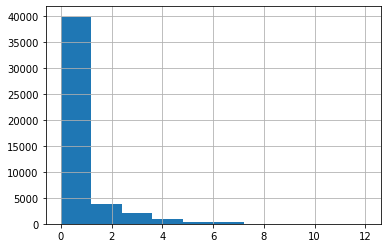

In [120]:
# Plot distribution of #jobs

jobs = ['Architect', 'Business Analyst', 'Exec', 'Data Analyst', 'DBA', 'SWE', 'PM', 'Tester', 'Systems analyst', 'Lead', 'Support', 'Writer']

explore_category('Jobs', jobs, 'Role')

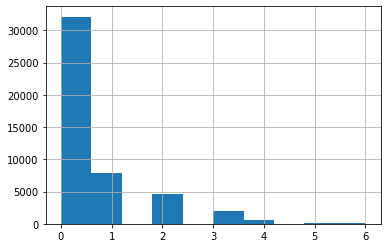

In [121]:
# Plot distribution of #clouds
        
clouds = ['AWS', 'DigitalOcean', 'GCP', 'Heroku', 'Azure', 'PythonAnywhere']
explore_category('Clouds', clouds, 'Cloud')

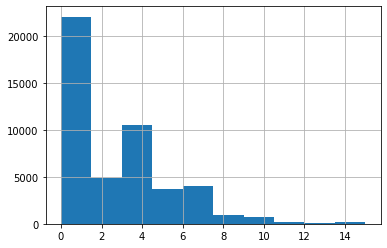

In [122]:
domains = ['Graphics','Data Analysis','GUI','Admin','Education','Embedded','Games','ML','Mobile','Multimedia','Networking','Scraping','Prototyping','Testing','Web']
explore_category('Domains', domains, 'Domain')

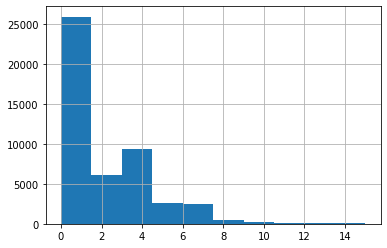

In [123]:
explore_category('Job Domains', domains, 'Job')

## Primary IDE Usage

Let's look at primary IDE usage. This is interesting as PyCharm didn't break out their two versions separately this time, but the data is there. Note that I have ignored secondary editors; that info is in the original CSV but seems less interesting to me.

In [124]:
def get_IDE_usage(df):
    total = 0
    results = {}
    for ide in df['IDE'].unique():
        count = len(df[df["IDE"] == ide])
        total += count
        results[ide] = count

    for ide, count in sorted(results.items(), key=lambda x: x[1], reverse=True):
        print(f'{ide}: {100 * count / total:.2f}%')
        
get_IDE_usage(df)

VS Code: 23.56%
PyCharm Professional Edition: 19.58%
PyCharm Community Edition: 13.84%
Vim: 9.30%
Sublime Text: 5.89%
Jupyter Notebook: 4.80%
Atom: 3.31%
Emacs: 3.26%
None: 2.34%
Other: 2.21%
Spyder: 2.03%
IDLE: 2.02%
IntelliJ IDEA: 1.95%
NotePad++: 1.61%
JupyterLab: 1.39%
Eclipse + Pydev: 1.15%
Python Tools for Visual Studio (PTVS): 0.56%
Gedit: 0.32%
Wing IDE: 0.30%
Aptana: 0.17%
TextMate: 0.16%
Komodo IDE: 0.10%
NetBeans: 0.08%
Komodo Editor: 0.07%
nan: 0.00%


Amongst those who self-identify as data scientists:

In [125]:
get_IDE_usage(df[df['Data Scientist'] == True])

VS Code: 21.25%
PyCharm Professional Edition: 15.31%
PyCharm Community Edition: 13.55%
Jupyter Notebook: 13.47%
Vim: 6.05%
Sublime Text: 5.50%
JupyterLab: 4.09%
Spyder: 4.06%
Atom: 3.11%
Emacs: 2.69%
IDLE: 2.24%
None: 1.94%
NotePad++: 1.58%
Other: 1.44%
IntelliJ IDEA: 1.44%
Eclipse + Pydev: 0.79%
Python Tools for Visual Studio (PTVS): 0.34%
Wing IDE: 0.30%
Gedit: 0.22%
Aptana: 0.22%
TextMate: 0.18%
Komodo Editor: 0.10%
Komodo IDE: 0.08%
NetBeans: 0.06%
nan: 0.00%


## Cohort Cross-Analysis

An interesting thing to explore is how the various cohorts relate to each other. For example, what big data tools are most popular with the users of each cloud? What data science packages are used most by people in different job functions? 

In [126]:
import seaborn as sns


def get_table(data, prefix):
    '''
    get the columns in the respective category
    and assign `none` and `Total` columns
    '''
    return (df.filter(regex='^' + prefix)
              .assign(none=lambda x: (1-x).prod(1),
                      Total=lambda x: x.any(1))
           )


def cross_analyze(df, cohort1, cohort2, how=None):
    """
    Cross-analyze two cohorts to see how many users they have in common in each case.
    
    By default counts are returned but the 'how' argument can change that. 
    
    'col' - what ratio of cohort 1 people also belong in cohort 2
    'col perc' - as above but display as % instead of ratio
    'col heatmap' - as above but returns a heatmap
    'row perc' - what ratio of cohort 2 people also belong in cohort 1
    'row perc' - as above but display as % instead of ratio
    'row heatmap' - as above but returns a heatmap
    
    For cohorts you can specify a prefix. This just gets turned in to regex with 
    '^' prepended so you can combine cohorts A and B with '(A|B)' etc.
    
    Note: this could be simplified as we don't really need to support both row and col
    versions. Callers could achieve the same effect by swapping the cohort arguments. 
    However, I find it useful to allow both because sometimes one dimension is much
    bigger than the other and you generally want to display that as rows. Maybe later
    I will change this to just use 'ratio', 'perc' and 'heatmap' and then just transpose
    the result if needed to make sure the #cols <= #rows. Another option would be to 
    transpose dataframe at start and end.
    """
    if how is None:
        how = ''
    result = get_table(df, cohort1).T @ get_table(df, cohort2)
    if how.startswith('row'):
        del result['none']
        del result['Total']
        # Divide each value by row Total
        for row in result.index:
            if row != 'Total':
                result.loc[row] /= result.loc['Total']
                if how == 'row perc':
                    for col in result.columns:
                        result.loc[row][col] = "{0:.2f}%".format(result.loc[row][col] * 100)
        if how == 'row heat':
            result.drop('Total', inplace=True)
            result = result.astype(float)
            return sns.heatmap(result)
    elif how.startswith('col'):
        result.drop('none', inplace=True)
        result.drop('Total', inplace=True)
        for col in result.columns:
            if col != 'Total':
                result[col] /= result['Total']
                if how == 'col perc':
                    result[col] = pd.Series(["{0:.2f}%".format(val * 100) for val in result[col]], index = result.index)
        if how == 'col heat':
            del result['Total']
            result = result.astype(float)
            return sns.heatmap(result)
    return result


In [127]:
# Turn IDE usage into 1-hot

for ide in ['VS Code', 
            'PyCharm Professional Edition',
            'PyCharm Community Edition',
            'Vim',
            'Sublime Text',
            'Atom',
            'Emacs',
            'Jupyter Notebook',
            'JupyterLab',
            'Spyder',
            'IntelliJ IDEA',
            'Eclipse + Pydev',
            'Python Tools for Visual Studio (PTVS)'
           ]:
    df[f'IDE: {ide}'] = df['IDE'] == ide

df['IDE: PyCharm'] = df['IDE: PyCharm Community Edition'] | df['IDE: PyCharm Professional Edition']
del df['IDE: PyCharm Community Edition']
del df['IDE: PyCharm Professional Edition']

In [128]:
# This will tell was what % of data analysts use each package, and similarly for ML folk
# The none column is the % of Data analysts that use none of these packages, etc.

# Let's first synthesize a few interesting additional cases
df['Job: ML+Analysis'] = df['Job: Data Analysis'] & df['Job: ML']
df['Job: ML Only'] = df['Job: ML'] & (~df['Job: Data Analysis'])
df['Job: Data Analysis Only'] = df['Job: Data Analysis'] & (~df['Job: ML'])
df['Job: Data Scientist'] = df['Data Scientist']
cross_analyze(df, '(Lib|DS)', '(Job: Data|Job: ML)', how='row perc')

,Job: Data Analysis,Job: ML,Job: ML+Analysis,Job: ML Only,Job: Data Analysis Only,Job: Data Scientist
DS: Keras,27.43%,45.21%,47.38%,35.24%,7.27%,42.13%
DS: Matplotlib,60.65%,70.39%,74.98%,49.32%,46.18%,69.59%
DS: NLTK,19.63%,29.49%,32.10%,17.52%,7.03%,28.59%
DS: NumPy,77.70%,85.02%,88.74%,67.95%,66.55%,80.76%
DS: Pandas,72.46%,78.88%,84.40%,53.55%,60.39%,76.47%
DS: PyTorch,20.19%,32.37%,33.62%,26.64%,6.61%,29.72%
DS: SciKit,47.17%,68.80%,74.20%,44.04%,19.87%,63.58%
DS: SciPy,50.03%,60.81%,65.74%,38.18%,34.16%,60.53%
DS: Seaborn,26.41%,35.87%,40.89%,12.83%,11.78%,39.37%
DS: TensorFlow,34.54%,54.44%,55.83%,48.08%,13.03%,48.48%


In [129]:
# This will tell us, for each library's users, what % identify as data analysts, and similarly for ML folk
# The 'none' column is the % of people who use the package that identify as neither data analyst nor ML person.

cross_analyze(df, '(Lib|DS)', '(Job: Data|Job: ML)', how='col perc')

,Job: Data Analysis,Job: ML,Job: ML+Analysis,Job: ML Only,Job: Data Analysis Only,Job: Data Scientist,none,Total
DS: Keras,75.71%,76.38%,65.73%,10.66%,9.99%,50.64%,12.07%,5077
DS: Matplotlib,71.60%,50.86%,44.49%,6.38%,27.12%,35.78%,20.74%,11871
DS: NLTK,76.95%,70.77%,63.24%,7.52%,13.71%,48.81%,13.93%,3575
DS: NumPy,66.07%,44.25%,37.92%,6.33%,28.15%,29.91%,26.38%,16481
DS: Pandas,70.46%,46.95%,41.25%,5.70%,29.21%,32.38%,22.60%,14411
DS: PyTorch,73.84%,72.49%,61.81%,10.68%,12.03%,47.35%,13.94%,3831
DS: SciKit,77.47%,69.16%,61.24%,7.92%,16.23%,45.47%,13.24%,8534
DS: SciPy,75.11%,55.88%,49.60%,6.28%,25.51%,39.58%,17.36%,9334
DS: Seaborn,85.16%,70.80%,66.27%,4.53%,18.89%,55.29%,8.88%,4346
DS: TensorFlow,71.23%,68.73%,57.87%,10.86%,13.36%,43.55%,16.35%,6795


In [130]:
# What % of each cloud's users use each DB solution

cross_analyze(df, 'DB', 'Cloud', how='row perc')

,Cloud: AWS,Cloud: DigitalOcean,Cloud: GCP,Cloud: Heroku,Cloud: Azure,Cloud: PythonAnywhere
DB: MongoDB,26.15%,27.92%,26.65%,30.82%,28.62%,26.26%
DB: MS SQL,10.23%,8.90%,12.39%,9.28%,27.45%,13.02%
DB: MySQL,43.40%,43.79%,44.25%,44.15%,42.62%,51.21%
DB: Oracle,6.24%,5.25%,7.21%,5.73%,11.33%,9.73%
DB: PostgreSQL,62.46%,71.47%,52.21%,68.63%,47.51%,49.89%
DB: Redis,29.73%,34.61%,24.69%,26.96%,20.12%,18.90%
DB: SQLite,39.02%,50.48%,39.42%,50.12%,41.03%,54.51%
none,10.31%,6.08%,15.39%,8.09%,15.21%,14.84%
Total,9251,3617,5309,3264,3071,1820


In [131]:
# What % of each DB's users use each cloud solution
cross_analyze(df, 'DB', 'Cloud', how='col perc')

,Cloud: AWS,Cloud: DigitalOcean,Cloud: GCP,Cloud: Heroku,Cloud: Azure,Cloud: PythonAnywhere,none,Total
DB: MongoDB,50.60%,21.13%,29.60%,21.04%,18.39%,10.00%,25.39%,4781
DB: MS SQL,38.36%,13.06%,26.68%,12.29%,34.18%,9.61%,30.86%,2466
DB: MySQL,43.24%,17.06%,25.30%,15.52%,14.10%,10.04%,32.58%,9285
DB: Oracle,37.99%,12.51%,25.21%,12.31%,22.91%,11.65%,38.64%,1519
DB: PostgreSQL,51.69%,23.12%,24.80%,20.04%,13.05%,8.12%,24.89%,11179
DB: Redis,58.69%,26.72%,27.98%,18.78%,13.19%,7.34%,22.13%,4686
DB: SQLite,39.23%,19.84%,22.74%,17.78%,13.69%,10.78%,34.42%,9203


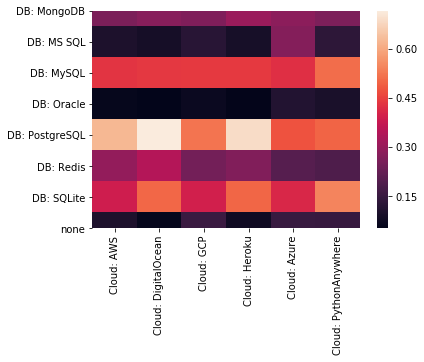

In [132]:
# Use a heatmap: what % of each cloud's users use each DB solution.
# Heroku and DigitalOcean users like PostgreSQL. 
# Oracle and MS SQL are not very popular on any provider except
# for MS SQL on Azure.
cross_analyze(df, 'DB', 'Cloud', how='row heat')

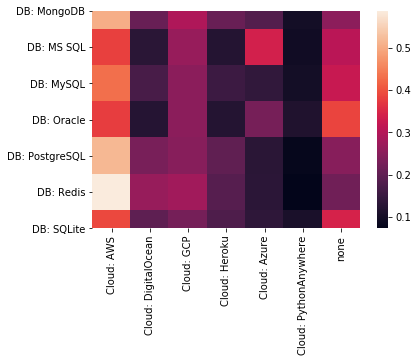

In [133]:
# Use a heatmap: what % of each DB's users use each cloud solution
# You can see that Azure get's the lion's share of all, although Azure is 
# competitive with MS SQL users. 

cross_analyze(df, 'DB', 'Cloud', how='col heat')

In [134]:
cross_analyze(df, 'BD', 'Cloud')

,Cloud: AWS,Cloud: DigitalOcean,Cloud: GCP,Cloud: Heroku,Cloud: Azure,Cloud: PythonAnywhere,none,Total
BD: Hadoop,903,274,586,289,402,182,377,1643
BD: Hive,588,161,362,152,259,122,256,1050
BD: Kafka,1284,449,771,358,463,196,430,2177
BD: Spark,1740,478,1047,468,747,301,613,3049
BD: Dask,585,222,402,173,244,108,334,1221
none,6307,2690,3552,2440,1915,1340,30815,41778
Total,9251,3617,5309,3264,3071,1820,32105,47308


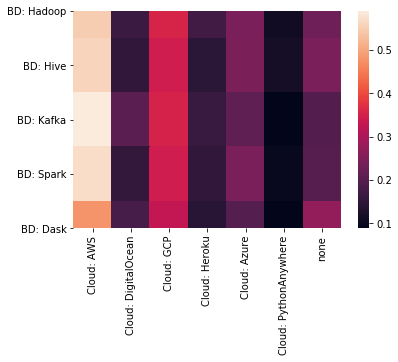

In [135]:
cross_analyze(df, 'BD', 'Cloud', how='col heat')

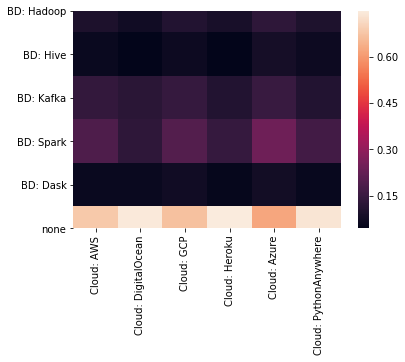

In [136]:
cross_analyze(df, 'BD', 'Cloud', how='row heat')

In [137]:
# Another potentially interesting view is to look at people who use one cloud provider exclusively
# We'll just do big 3.

df['Cloud: Only AWS'] = df['Cloud: AWS'] & ~(df['Cloud: Azure'] | df['Cloud: GCP'])
df['Cloud: Only Azure'] = df['Cloud: Azure'] & ~(df['Cloud: AWS'] | df['Cloud: GCP'])
df['Cloud: Only GCP'] = df['Cloud: GCP'] & ~(df['Cloud: Azure'] | df['Cloud: AWS'])

In [138]:
# We can see from this that Azure wins MS SQL customers (not surprising)
# and AWS is winning PostgreSQL and Redis customers.
cross_analyze(df, 'DB', 'Cloud: Only', how='row perc')

,Cloud: Only AWS,Cloud: Only Azure,Cloud: Only GCP
DB: MongoDB,22.20%,19.65%,17.37%
DB: MS SQL,6.41%,29.67%,8.20%
DB: MySQL,40.85%,32.88%,38.10%
DB: Oracle,4.99%,8.37%,4.88%
DB: PostgreSQL,62.62%,34.34%,39.46%
DB: Redis,29.00%,12.26%,16.29%
DB: SQLite,36.22%,36.77%,34.73%
none,10.33%,20.43%,22.24%
Total,5535,1028,2050


In [139]:
cross_analyze(df, 'Job', 'DS')

,DS: Keras,DS: Matplotlib,DS: NLTK,DS: NumPy,DS: Pandas,DS: PyTorch,DS: SciKit,DS: SciPy,DS: Seaborn,DS: TensorFlow,none,Total
Job: Graphics,478,1045,263,1264,959,393,686,917,376,622,906,2359
Job: Data Analysis,3844,8500,2751,10889,10154,2829,6611,7011,3701,4840,1968,14014
Job: GUI,567,1685,378,2254,1785,473,939,1311,443,825,1041,3640
Job: Admin,1686,4352,1340,6383,5706,1319,2989,3494,1478,2394,2846,10270
Job: Education,1193,2752,846,3320,2786,933,1902,2190,1059,1586,1318,4974
Job: Embedded,314,800,180,1058,744,280,418,661,212,469,413,1612
Job: Games,97,205,68,298,201,98,123,191,70,149,434,817
Job: ML,3878,6038,2530,7293,6766,2777,5902,5216,3077,4670,760,8578
Job: Mobile,153,286,118,410,365,158,205,271,105,218,450,994
Job: Multimedia,135,260,94,368,288,139,183,263,86,188,259,703


In [140]:
cross_analyze(df, 'Job', 'DB')

,DB: MongoDB,DB: MS SQL,DB: MySQL,DB: Oracle,DB: PostgreSQL,DB: Redis,DB: SQLite,none,Total
Job: Graphics,328,177,609,145,488,221,610,1255,2359
Job: Data Analysis,2783,1646,4898,965,5852,2406,4973,3641,14014
Job: GUI,586,417,1311,268,1281,453,1588,1067,3640
Job: Admin,2173,1087,3906,679,5671,2761,4261,1730,10270
Job: Education,866,448,1713,318,1540,509,1711,1849,4974
Job: Embedded,335,159,554,86,557,260,663,520,1612
Job: Games,116,65,200,52,133,68,199,482,817
Job: ML,1981,981,3124,566,3329,1360,2908,2352,8578
Job: Mobile,150,141,345,95,293,125,289,449,994
Job: Multimedia,139,88,247,64,255,115,254,260,703


In [141]:
cross_analyze(df, 'Job', 'Lib')

,Lib: aiohttp,Lib: Asyncio,Lib: Kivy,Lib: Pillow,Lib: PyGame,Lib: PyGTK,Lib: PyQT,Lib: Requests,Lib: Scrapy,Lib: Six,Lib: Tkinter,Lib: Twisted,Lib: wxPython,none,Total
Job: Graphics,181,322,173,730,359,156,508,694,303,239,484,103,197,926,2359
Job: Data Analysis,1559,2857,659,4466,1139,473,2294,7721,2710,1780,2317,647,677,2958,14014
Job: GUI,390,722,411,1232,580,317,1307,1690,496,465,1147,213,430,653,3640
Job: Admin,1773,2948,507,3465,779,432,1517,7209,1894,1779,1444,666,519,1383,10270
Job: Education,463,803,350,1564,775,239,947,2095,866,428,1220,172,279,1441,4974
Job: Embedded,194,419,149,516,244,155,450,725,255,196,382,111,156,344,1612
Job: Games,73,104,79,173,256,73,163,183,96,73,160,43,71,358,817
Job: ML,881,1644,477,3067,854,333,1451,4535,2016,1021,1617,369,399,1796,8578
Job: Mobile,123,169,184,268,178,104,193,315,175,124,181,75,109,376,994
Job: Multimedia,108,169,91,268,139,88,202,303,138,116,170,67,93,204,703


In [142]:
cross_analyze(df, 'Cloud', 'Web')

,Web: Django,Web: Flask,none,Total
Cloud: AWS,5066,5783,1630,9251
Cloud: DigitalOcean,2362,2366,409,3617
Cloud: GCP,2686,3190,1193,5309
Cloud: Heroku,2282,2235,266,3264
Cloud: Azure,1488,1809,766,3071
Cloud: PythonAnywhere,1222,1074,267,1820
Cloud: Only AWS,2985,3254,1035,5535
Cloud: Only Azure,391,517,352,1028
Cloud: Only GCP,866,1006,638,2050
none,3382,3676,26556,32105


In [143]:
# What % of each IDE's users use each cloud solution
cross_analyze(df, 'IDE:', 'Cloud', how='col perc')

,Cloud: AWS,Cloud: DigitalOcean,Cloud: GCP,Cloud: Heroku,Cloud: Azure,Cloud: PythonAnywhere,Cloud: Only AWS,Cloud: Only Azure,Cloud: Only GCP,none,Total
IDE: VS Code,41.14%,17.80%,23.08%,17.64%,15.89%,7.12%,23.30%,5.55%,8.40%,31.82%,5550
IDE: Vim,41.83%,18.95%,20.27%,11.37%,8.26%,3.97%,26.12%,2.19%,6.71%,38.58%,2190
IDE: Sublime Text,41.86%,18.66%,22.84%,16.57%,9.44%,8.50%,25.72%,2.23%,8.50%,34.08%,1388
IDE: Atom,34.79%,15.92%,19.51%,15.66%,9.50%,11.04%,22.21%,2.95%,7.96%,38.77%,779
IDE: Emacs,39.79%,15.60%,19.12%,11.44%,9.49%,4.29%,25.88%,2.08%,6.89%,39.27%,769
IDE: Jupyter Notebook,35.37%,7.25%,31.83%,12.02%,17.68%,10.08%,14.24%,4.51%,10.26%,38.64%,1131
IDE: JupyterLab,35.67%,7.62%,30.18%,10.98%,15.55%,6.40%,18.29%,6.10%,10.67%,40.24%,328
IDE: Spyder,20.71%,4.81%,16.32%,5.86%,15.27%,5.86%,9.00%,7.32%,6.28%,60.46%,478
IDE: IntelliJ IDEA,51.96%,12.17%,22.83%,10.43%,12.17%,4.35%,32.83%,4.35%,7.39%,28.91%,460
IDE: Eclipse + Pydev,26.57%,7.01%,18.45%,4.80%,12.55%,7.38%,15.13%,4.80%,6.64%,52.40%,271


In [144]:
# What % of each cloud's users use each IDE
cross_analyze(df, 'Cloud', 'IDE:', how='col perc')

,IDE: VS Code,IDE: Vim,IDE: Sublime Text,IDE: Atom,IDE: Emacs,IDE: Jupyter Notebook,IDE: JupyterLab,IDE: Spyder,IDE: IntelliJ IDEA,IDE: Eclipse + Pydev,IDE: Python Tools for Visual Studio (PTVS),IDE: PyCharm,none,Total
Cloud: AWS,24.68%,9.90%,6.28%,2.93%,3.31%,4.32%,1.26%,1.07%,2.58%,0.78%,0.23%,35.69%,6.96%,9251
Cloud: DigitalOcean,27.32%,11.47%,7.16%,3.43%,3.32%,2.27%,0.69%,0.64%,1.55%,0.53%,0.17%,34.75%,6.72%,3617
Cloud: GCP,24.13%,8.36%,5.97%,2.86%,2.77%,6.78%,1.86%,1.47%,1.98%,0.94%,0.43%,30.02%,12.41%,5309
Cloud: Heroku,29.99%,7.63%,7.05%,3.74%,2.70%,4.17%,1.10%,0.86%,1.47%,0.40%,0.28%,31.95%,8.67%,3264
Cloud: Azure,28.72%,5.89%,4.27%,2.41%,2.38%,6.51%,1.66%,2.38%,1.82%,1.11%,0.65%,29.83%,12.37%,3071
Cloud: PythonAnywhere,21.70%,4.78%,6.48%,4.73%,1.81%,6.26%,1.15%,1.54%,1.10%,1.10%,1.10%,31.59%,16.65%,1820
Cloud: Only AWS,23.36%,10.33%,6.45%,3.13%,3.60%,2.91%,1.08%,0.78%,2.73%,0.74%,0.23%,38.12%,6.54%,5535
Cloud: Only Azure,29.96%,4.67%,3.02%,2.24%,1.56%,4.96%,1.95%,3.40%,1.95%,1.26%,1.17%,28.99%,14.88%,1028
Cloud: Only GCP,22.73%,7.17%,5.76%,3.02%,2.59%,5.66%,1.71%,1.46%,1.66%,0.88%,0.63%,28.63%,18.10%,2050


In [145]:
# What % of each IDE's users use each DB solution
cross_analyze(df, 'IDE:', 'DB', how='col perc')

,DB: MongoDB,DB: MS SQL,DB: MySQL,DB: Oracle,DB: PostgreSQL,DB: Redis,DB: SQLite,none,Total
IDE: VS Code,23.44%,12.14%,39.57%,5.41%,51.33%,19.91%,41.62%,12.72%,5550
IDE: Vim,15.11%,4.16%,33.56%,4.43%,56.39%,26.67%,46.62%,14.93%,2190
IDE: Sublime Text,19.24%,6.99%,43.59%,4.97%,50.29%,21.90%,41.14%,14.19%,1388
IDE: Atom,16.56%,9.24%,41.72%,5.13%,42.88%,13.86%,37.74%,21.05%,779
IDE: Emacs,13.52%,5.20%,28.74%,2.99%,58.00%,21.59%,43.56%,16.91%,769
IDE: Jupyter Notebook,24.14%,16.62%,45.18%,10.79%,27.76%,6.28%,32.98%,23.52%,1131
IDE: JupyterLab,21.95%,17.38%,35.98%,9.15%,36.28%,9.15%,34.45%,24.39%,328
IDE: Spyder,15.06%,17.99%,34.10%,10.67%,18.83%,3.97%,31.80%,34.31%,478
IDE: IntelliJ IDEA,23.26%,10.00%,42.17%,11.09%,55.00%,27.39%,31.96%,12.39%,460
IDE: Eclipse + Pydev,18.45%,15.13%,41.33%,14.76%,40.22%,10.70%,39.11%,18.45%,271


In [146]:
# What % of each job's users use each IDE
cross_analyze(df, 'Job:', 'IDE:', how='col perc')

,IDE: VS Code,IDE: Vim,IDE: Sublime Text,IDE: Atom,IDE: Emacs,IDE: Jupyter Notebook,IDE: JupyterLab,IDE: Spyder,IDE: IntelliJ IDEA,IDE: Eclipse + Pydev,IDE: Python Tools for Visual Studio (PTVS),IDE: PyCharm,none,Total
Job: Graphics,11.49%,4.24%,4.24%,2.54%,3.14%,4.45%,1.36%,1.95%,0.76%,1.40%,0.47%,16.96%,47.01%,2359
Job: Data Analysis,20.49%,8.38%,5.20%,2.92%,3.13%,6.66%,2.06%,2.64%,1.56%,0.84%,0.41%,27.45%,18.25%,14014
Job: GUI,18.30%,6.51%,5.80%,2.53%,2.66%,2.01%,0.44%,1.48%,1.04%,1.84%,0.77%,30.71%,25.91%,3640
Job: Admin,23.18%,12.39%,5.59%,2.80%,4.18%,1.95%,0.79%,0.91%,2.28%,1.03%,0.31%,31.39%,13.20%,10270
Job: Education,17.65%,5.97%,5.21%,3.52%,2.21%,5.97%,1.51%,2.49%,1.09%,0.86%,0.46%,22.84%,30.22%,4974
Job: Embedded,19.48%,8.56%,5.27%,2.42%,3.29%,3.04%,0.50%,1.67%,0.68%,2.48%,0.62%,26.61%,25.37%,1612
Job: Games,9.42%,2.08%,3.67%,2.69%,0.98%,2.57%,0.61%,2.08%,0.61%,1.84%,0.86%,14.69%,57.89%,817
Job: ML,20.98%,6.74%,4.62%,2.67%,2.63%,9.31%,2.60%,3.02%,1.24%,0.62%,0.51%,26.73%,18.33%,8578
Job: Mobile,10.76%,2.01%,4.12%,3.82%,1.21%,2.62%,0.20%,1.71%,1.21%,2.11%,1.31%,20.12%,48.79%,994
Job: Multimedia,16.22%,5.26%,7.11%,2.99%,1.28%,1.56%,0.57%,0.85%,0.85%,1.56%,1.00%,22.05%,38.69%,703


In [147]:
# What % of each library's users use each IDE
cross_analyze(df, '(Lib|DS|Web)', 'IDE:', how='col perc')

,IDE: VS Code,IDE: Vim,IDE: Sublime Text,IDE: Atom,IDE: Emacs,IDE: Jupyter Notebook,IDE: JupyterLab,IDE: Spyder,IDE: IntelliJ IDEA,IDE: Eclipse + Pydev,IDE: Python Tools for Visual Studio (PTVS),IDE: PyCharm,none,Total
Web: Django,23.71%,8.05%,5.91%,3.08%,2.38%,3.56%,0.92%,1.07%,1.74%,0.87%,0.42%,35.70%,12.59%,11325
Web: Flask,25.12%,9.72%,5.88%,2.90%,3.23%,3.94%,1.23%,1.15%,1.89%,0.66%,0.38%,34.15%,9.77%,12527
DS: Keras,22.38%,5.79%,4.57%,3.13%,2.15%,11.33%,3.11%,3.47%,1.52%,0.61%,0.35%,29.64%,11.96%,5077
DS: Matplotlib,22.36%,8.57%,5.26%,3.22%,3.16%,7.94%,2.32%,3.16%,1.52%,0.74%,0.40%,29.37%,11.98%,11871
DS: NLTK,20.78%,6.77%,5.87%,3.08%,2.69%,12.17%,3.08%,2.91%,1.37%,0.67%,0.36%,27.94%,12.31%,3575
DS: NumPy,22.38%,8.55%,5.52%,3.12%,3.25%,6.30%,1.84%,2.55%,1.63%,0.82%,0.41%,31.24%,12.40%,16481
DS: Pandas,23.26%,7.99%,5.49%,2.94%,2.94%,7.05%,2.13%,2.66%,1.71%,0.67%,0.39%,31.52%,11.24%,14411
DS: PyTorch,23.07%,6.97%,4.96%,3.05%,2.82%,9.92%,3.05%,2.38%,1.75%,0.70%,0.34%,27.67%,13.31%,3831
DS: SciKit,22.78%,7.09%,5.17%,2.93%,2.77%,9.71%,2.92%,3.30%,1.63%,0.64%,0.40%,29.88%,10.78%,8534
DS: SciPy,21.69%,8.71%,5.16%,3.25%,3.59%,7.62%,2.44%,3.40%,1.54%,0.79%,0.33%,29.17%,12.30%,9334


## For Reference: The Full Set of Columns in CSV

In [148]:
df = pd.read_csv("python_psf_external_19.csv")

list(df.columns)

['response_id',
 'Is Python the main language you use for your current projects?',
 'Bash / Shell:What other language(s) do you use?',
 'C/C++:What other language(s) do you use?',
 'C#:What other language(s) do you use?',
 'Clojure:What other language(s) do you use?',
 'CoffeeScript:What other language(s) do you use?',
 'Go:What other language(s) do you use?',
 'Groovy:What other language(s) do you use?',
 'HTML/CSS:What other language(s) do you use?',
 'Java:What other language(s) do you use?',
 'JavaScript:What other language(s) do you use?',
 'Kotlin:What other language(s) do you use?',
 'None:What other language(s) do you use?',
 'Objective-C:What other language(s) do you use?',
 'Other - Write In::What other language(s) do you use?',
 'Perl:What other language(s) do you use?',
 'PHP:What other language(s) do you use?',
 'R:What other language(s) do you use?',
 'Ruby:What other language(s) do you use?',
 'Rust:What other language(s) do you use?',
 'Scala:What other language(s) do y

In [ ]:
import pandas as pd
from sanddance import Explorer
sd = Explorer()
sd.show()

df = pd.DataFrame([
    {'x': 1, 'y': 1, 'text': 'first'},
    {'x': 2, 'y': 2, 'text': 'second'},
    {'x': 3, 'y': 3, 'text': 'third'},
])
sd.load(df)